# Goal

Assess quality of barcode calling and transcript detection.

# Import

In [11]:
%load_ext autoreload
%autoreload 2

import rapids_singlecell as rsc
import scanpy as sc
import muon as mu
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype']  = 42
mpl.rcParams['text.usetex']  = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
mdata = mu.read_h5mu("/data1/rudenska/EYW/SIG13/scanpy_outs/SIG13_doublets_DSB7.h5mu")
bc = mdata.mod["bc"]

/home/wange7/miniforge3/envs/rapids_sc/lib/python3.10/site-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/wange7/miniforge3/envs/rapids_sc/lib/python3.10/site-packages/mudata/_core/mudata.py:1461: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


# Clustering by BC expression

In [3]:
# add feature calls to bc 
bc.obs['feature_call_DSB7'] = mdata.mod['rna'].obs['feature_call_DSB7']
bc.obs[['feature_call_round1_DSB7', 'feature_call_round2_DSB7']] = (
    bc.obs['feature_call_DSB7']
       .str.split('|', expand=True)
       .astype('category')
)

In [4]:
bc.X = bc.layers['counts'].copy()
rsc.get.anndata_to_GPU(bc)

In [5]:
rsc.pp.normalize_total(bc)
rsc.pp.log1p(bc)
rsc.pp.scale(bc)

In [6]:
rsc.pp.neighbors(bc, use_rep="X", metric='correlation')
rsc.tl.umap(bc, min_dist=0.3)

2026-01-07 09:37:04 | [INFO] maxp pruned
2026-01-07 09:37:04 | [INFO] cmap pruned
2026-01-07 09:37:04 | [INFO] kern dropped
2026-01-07 09:37:04 | [INFO] post pruned
2026-01-07 09:37:04 | [INFO] FFTM dropped
2026-01-07 09:37:04 | [INFO] GPOS pruned
2026-01-07 09:37:04 | [INFO] GSUB pruned
2026-01-07 09:37:04 | [INFO] glyf pruned
2026-01-07 09:37:04 | [INFO] Added gid0 to subset
2026-01-07 09:37:04 | [INFO] Added first four glyphs to subset
2026-01-07 09:37:04 | [INFO] Closing glyph list over 'MATH': 37 glyphs before
2026-01-07 09:37:04 | [INFO] Glyph names: ['.notdef', '.null', 'A', 'B', 'D', 'F', 'G', 'I', 'L', 'M', 'N', 'P', 'S', 'T', 'U', 'a', 'c', 'd', 'e', 'f', 'four', 'i', 'k', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'r', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'underscore']
2026-01-07 09:37:04 | [INFO] Glyph IDs:   [0, 1, 2, 3, 20, 21, 22, 23, 25, 26, 36, 37, 39, 41, 42, 44, 47, 48, 49, 51, 54, 55, 56, 66, 68, 70, 71, 72, 73, 76, 78, 79, 81, 82, 85, 87, 88]
2026-01-0

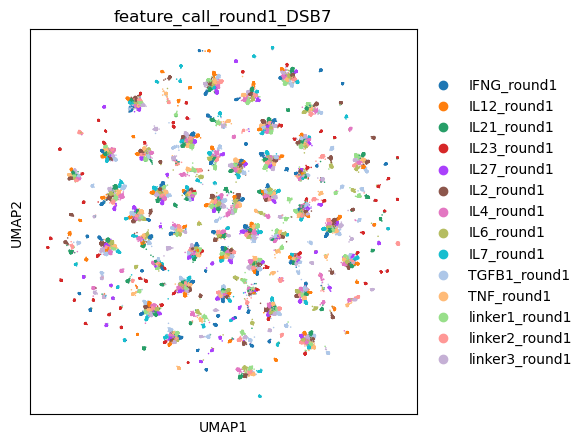

In [8]:
plt.rcParams['figure.figsize'] = (5,5)
g = sc.pl.umap(bc, color=['feature_call_round1_DSB7'], size=5, return_fig=True)
g.savefig("/data1/rudenska/EYW/git_projects/SIG13/analysis_outs/plots/qc/barcode_calling_DSB7_ligand1.pdf")
g.savefig("/data1/rudenska/EYW/git_projects/SIG13/analysis_outs/plots/qc/barcode_calling_DSB7_ligand1.png")

2026-01-07 09:37:27 | [INFO] maxp pruned
2026-01-07 09:37:27 | [INFO] cmap pruned
2026-01-07 09:37:27 | [INFO] kern dropped
2026-01-07 09:37:27 | [INFO] post pruned
2026-01-07 09:37:27 | [INFO] FFTM dropped
2026-01-07 09:37:27 | [INFO] GPOS pruned
2026-01-07 09:37:27 | [INFO] GSUB pruned
2026-01-07 09:37:27 | [INFO] glyf pruned
2026-01-07 09:37:27 | [INFO] Added gid0 to subset
2026-01-07 09:37:27 | [INFO] Added first four glyphs to subset
2026-01-07 09:37:27 | [INFO] Closing glyph list over 'MATH': 47 glyphs before
2026-01-07 09:37:27 | [INFO] Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'S', 'T', 'U', 'W', 'X', 'a', 'c', 'd', 'e', 'eight', 'f', 'five', 'four', 'i', 'k', 'l', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'r', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'underscore', 'zero']
2026-01-07 09:37:27 | [INFO] Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 36, 37, 38, 39, 40, 41, 42, 44, 46, 47

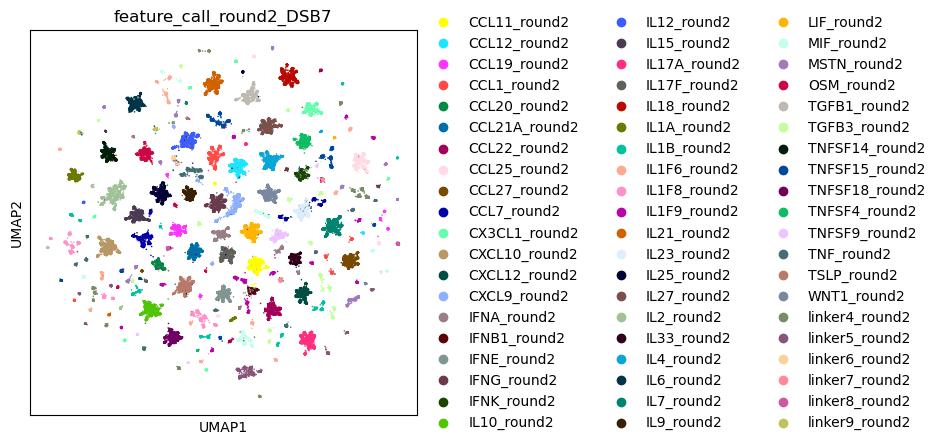

In [9]:
plt.rcParams['figure.figsize'] = (5,5)
g = sc.pl.umap(bc, color=['feature_call_round2_DSB7'], size=5, return_fig=True)
g.savefig("/data1/rudenska/EYW/git_projects/SIG13/analysis_outs/plots/qc/barcode_calling_DSB7_ligand2.pdf")
g.savefig("/data1/rudenska/EYW/git_projects/SIG13/analysis_outs/plots/qc/barcode_calling_DSB7_ligand2.png")

In general, the barcodes seem to cluster well. There's an interesting pattern where larger clumps appear to form based on the round 2 ligand. I wonder if this means that the round 1 ligands are not as highly detected and in these clusters the round 2 bc dominates.

There are smatterings of cells that are caled separately than their indicated cluster, which could indicate an inappropriate call. Hard to say without f urther analysis but could be useful to tune up the calling in the future.

It may be worth overlaying cells onto these clusters in the future as well to see whether some DEGs are driven by inappropriate or less confident calls.

# Counting Features

In [10]:
rna = mdata.mod['rna']

/tmp/ipykernel_2130441/3907230808.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  callCounts = rna.obs.groupby('feature_call_DSB7').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
2026-01-07 09:44:29 | [INFO] maxp pruned
2026-01-07 09:44:29 | [INFO] cmap pruned
2026-01-07 09:44:29 | [INFO] kern dropped
2026-01-07 09:44:29 | [INFO] post pruned
2026-01-07 09:44:29 | [INFO] FFTM dropped
2026-01-07 09:44:29 | [INFO] GPOS pruned
2026-01-07 09:44:29 | [INFO] GSUB pruned
2026-01-07 09:44:29 | [INFO] glyf pruned
2026-01-07 09:44:29 | [INFO] Added gid0 to subset
2026-01-07 09:44:29 | [INFO] Added first four glyphs to subset
2026-01-07 09:44:29 | [INFO] Closing glyph list over 'MATH': 31 glyphs before
2026-01-07 09:44:29 | [INFO] Glyph names: ['.notdef', '.null', 'C', 'H', 'N

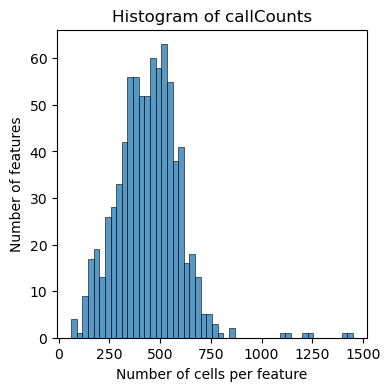

In [19]:
callCounts = rna.obs.groupby('feature_call_DSB7').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

plt.figure(figsize=(4, 4))
g = sns.histplot(callCounts['counts'], bins=50, kde=False)
g.set_xlabel('Number of cells per feature')
g.set_ylabel('Number of features')
g.set_title('Histogram of callCounts')
plt.savefig("/data1/rudenska/EYW/git_projects/SIG13/analysis_outs/plots/qc/barcode_calling_DSB7_callCounts_histogram.pdf", bbox_inches='tight')

In [ ]:
# get median cells per condition
callCounts.counts.median()

447.0

# RNA Quality

In [46]:
rna = sc.read_h5ad("/data1/rudenska/EYW/SIG13/scanpy_outs/SIG13_doublets_DSB7.h5ad")

2026-01-07 10:13:13 | [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-01-07 10:13:13 | [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-01-07 10:13:13 | [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-01-07 10:13:14 | [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-01-07 10:13:14 | [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If 

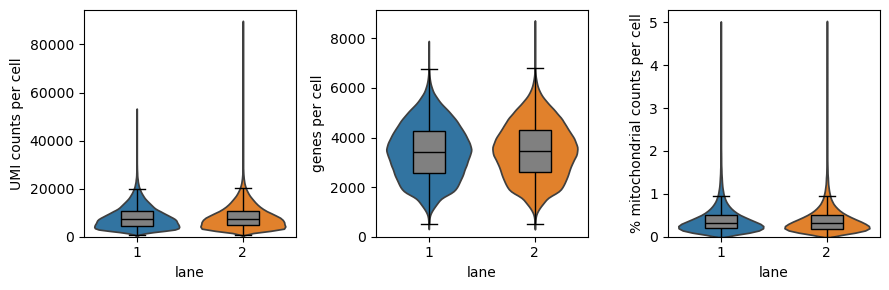

In [67]:
# plot bc UMI count density
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

sns.violinplot(data=rna.obs, x='lane', y='total_counts', hue='lane', ax=axes[0], inner=None)
sns.boxplot(data=rna.obs, x='lane', y='total_counts', ax=axes[0], width=0.3, color='grey', linecolor='black', showfliers=False)
axes[0].set_ylim(bottom=0)
axes[0].set_ylabel("UMI counts per cell")

sns.violinplot(data=rna.obs, x='lane', y='n_genes_by_counts', hue='lane', ax=axes[1], inner=None)
sns.boxplot(data=rna.obs, x='lane', y='n_genes_by_counts', ax=axes[1], width=0.3, color='grey', linecolor='black', showfliers=False)
axes[1].set_ylim(bottom=0)
axes[1].set_ylabel("genes per cell")

sns.violinplot(data=rna.obs, x='lane', y='pct_counts_mt', hue='lane', ax=axes[2], inner=None)
sns.boxplot(data=rna.obs, x='lane', y='pct_counts_mt', ax=axes[2], width=0.3, color='grey', linecolor='black', showfliers=False)
axes[2].set_ylim(bottom=0)
axes[2].set_ylabel("% mitochondrial counts per cell")

plt.tight_layout()
plt.savefig("/data1/rudenska/EYW/git_projects/SIG13/analysis_outs/plots/qc/rna_quality_metrics.pdf", bbox_inches='tight')
plt.show()